# Text Clustering Assignment by:
- Yusri Al-Sanaani
- Hetvi Soni
- Tavleen Kour
- Immanuella Iyawe

Group: Group: DSA_202101_ 7

---
### Import the required libraries
---

In [ ]:
import re   
import nltk
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Data Preparation**

In this assignemnt, we’ll cluster text data into different categories. 
- First download the some books from gutenberg to create a dataset.
- The dataset consists of five different books for different authors.
- The genres of the books can be categorized into 5 categories:
 - Metaphysical Thriller
 - Children's Literature
 - Poetry
 - Epic poetry,Christian Mythology
 - Romance Novel
- For most part, we’ll ignore the labels but we’ll use them while evaluating the trained model since many of the evaluation metrics need the “true” labels.
 


---
# Import some books
---

In [ ]:
nltk.download('gutenberg')
book1 = nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
#book2 = nltk.corpus.gutenberg.raw('carroll-alice.txt')
book2 = nltk.corpus.gutenberg.raw('edgeworth-parents.txt')
book3 = nltk.corpus.gutenberg.raw('whitman-leaves.txt')
book4 = nltk.corpus.gutenberg.raw('milton-paradise.txt')
book5 = nltk.corpus.gutenberg.raw('austen-sense.txt')
# Create a list of books
books=[book1,book2,book3,book4,book5]

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [ ]:
genres=['Metaphysical Thriller', "Children's Literature",
        'Poetry','Epic poetry,Christian Mythology','Romance Novel']

## Extract the books titles and authors names using regex

In [ ]:
# Extract the books_titles and authors_names by creating a regex pattern 
# that match book title, author name, and year of publication:
def titles_authors(books):
    books_authors_names=[]
    for book in books:
        la=re.findall("(\[[ a-zA-Z0-9 '_.+-|\]+ by [ a-zA-Z0-9-]+|\.[ a-zA-Z0-9-.]+\])", book)
        books_authors_names.append(''.join(la[0]))
        # Now, we can remove special characters, numbers,and right/left white space
        # to get only the book title and author name:
    clean_books_authors_names=[]
    for i in range(len(books_authors_names)):
        clean_names=re.sub(r'[\d+\\!"#$%&()*+,-./:;?@[\]^_`{|}~]',' ',books_authors_names[i]).strip() 
        split_names=re.split('by',clean_names)
        clean_books_authors_names.append(split_names)
    return books_authors_names,clean_books_authors_names

In [ ]:
# Create book_names list and authors_labels list

def title_author(clean_books_authors_names):
    def list_split(lst):
        return lst[:(len(lst)//2)], lst[(len(lst)//2):]
    books_names=[]
    authors_names=[]
    for i in range(len(clean_books_authors_names)):
        book, author = list_split(clean_books_authors_names[i])
        books_names.append(''.join(book).strip())
        authors_names.append(''.join(author).strip())
    # Create an automatic list for authors last name:
    authors_labels=[]
    for i in range(len(authors_names)):
        authors_labels.append(authors_names[i].split()[-1])
    return books_names,authors_labels

In [ ]:
# books_authors_names before cleaning
books_authors_names,clean_books_authors_names=titles_authors(books)
#print('The book title, author name, and year of publication:')
#books_authors_names

In [ ]:
# books_authors_names after cleaning
#clean_books_authors_names

In [ ]:
# we need list of books titles and authors
books_titles,authors=title_author(clean_books_authors_names)
# list of books titles
#books_titles

In [ ]:
# also we need a list of authors ['Chesterton','Carroll','Whitman','Milton','Bryant']
#authors

In [ ]:
# Display the books and the curresponding authors
books_authors=pd.DataFrame({'Book Title':books_titles, 'Authors':authors,'Genres':genres},index=[1,2,3,4,5])
books_authors
books_authors.to_excel("books_authors.xlsx", index=False)

# Create a general function to clean the data of multiple books
This function takes list of books as input and returns a list of cleaned books. The cleaning includes:

- Removing multiple spaces and left/right white spaces.
- Conevrting capital characters to lower case
- Removing special characters
- Removing single character word

## Clean the data of multiple books

In [ ]:
def get_clean_text(textbooks_data):
    cleaned_books=[]
    for book in textbooks_data:
        single_lower= re.sub(r'\s+',' ',book).lower() # Multiple space removal and conevrt to lower case
        #clean_text = re.sub(r'[\\!"#$%&()*+,-./:;?@[\]^_`{|}~]',' ',single_lower).strip() # Remove special characters
        clean_text = re.sub('[^a-zA-Z]',' ', single_lower)
        #clean_text = re.sub(r"\s+[a-zA-Z]\s+", ' ', clean_text) # remove single character word
        cleaned_books.append(clean_text)
    return cleaned_books

In [ ]:
cleaned_books=get_clean_text(books)

## Defining a function to partition multiple books (get_chunks() function):
- This function takes dict as input  that contains the labels (books and authors names) and books content.
- It returns a list of partitioned books with labeling each partition to the book it belongs to.

## Partition multiple books

In [ ]:
# partitioning the text data with auto labeling 
def get_chunks(chunk_books_dict):
    import nltk
    nltk.download('punkt')
    chunk_books=[]
    chunk_books_labels=[]
    for label,book in chunk_books_dict.items():
        #splits = book.split()
        tokenized_word=nltk.word_tokenize(book)
        labeled_chunks=[]
        chunks_labels=[]
        for i in range(0,len(tokenized_word),150):
            #labeled_chunks.append((' '.join(tokenized_word[i:150+i]),label))
            labeled_chunks.append(' '.join(tokenized_word[i:150+i]))
            chunks_labels.append(label)
        chunk_books.append(labeled_chunks)
        chunk_books_labels.append(chunks_labels)
    return chunk_books,chunk_books_labels

In [ ]:
# uncleaned books books
uncleaned_chunk_books_dict={}
for i,book in enumerate(books):
    uncleaned_chunk_books_dict[authors[i]]=book
chunk_books1,chunk_books_labels1=get_chunks(uncleaned_chunk_books_dict)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#chunk_books_dict1=dict(zip(authors_labels,cleaned_books))
chunk_books_dict={}
for i,book in enumerate(cleaned_books):
    chunk_books_dict[authors[i]]=book
chunk_books,chunk_books_labels=get_chunks(chunk_books_dict)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Check if each book contains enough text data to ensure getting 200 chunks
for i,book in enumerate(chunk_books):
    if len(book)<200:
        print('The book # {} does not contain enough text data (it has only {} chunks).'.format(i+1,len(book)))
    else:
        print("The book # {} contains {} chunks.".format(i+1,len(book)))

The book # 1 contains 392 chunks.
The book # 2 contains 1139 chunks.
The book # 3 contains 843 chunks.
The book # 4 contains 537 chunks.
The book # 5 contains 806 chunks.


## Creating random samples of 200 partitions for each book
Defining a function to return 200 random chunks for each book(get_random_chunks function):
- This function takes a list of previously partioned books as input.
- It returns a list of books conataining 200 random chunks each.

In [ ]:

def get_random_chunks(chunk_books):
    import random
    random.seed(1)
    random_chunks=[]
    for book in chunk_books:
        chunks=random.sample(book, 200)
        random_chunks.append(chunks)
    return random_chunks

## Creating random samples of 200 partitions for each book

In [ ]:
books_random_chunks_uncleaned=get_random_chunks(chunk_books1)
books_random_chunks=get_random_chunks(chunk_books)
#print(random_chunks[0][0],'\n\n',random_chunks[1][0])
# Check if each book contains enough text data to ensure getting 200 chunks
for i,book in enumerate(books_random_chunks):
    print("The book # {} contains {} chunks.".format(i+1,len(book)))

The book # 1 contains 200 chunks.
The book # 2 contains 200 chunks.
The book # 3 contains 200 chunks.
The book # 4 contains 200 chunks.
The book # 5 contains 200 chunks.


## Create data frame

In [ ]:
# Uncleaned dataframe
df_books1=pd.DataFrame()
for i in range(len(books_random_chunks)):
    dfs=pd.DataFrame({'Book Text Data':books_random_chunks_uncleaned[i],'Author':chunk_books_labels1[i][:200]})
    df_books1=df_books1.append(dfs)

df_books1.reset_index(drop=True,inplace=True)
df_books1.sample(5)

,Book Text Data,Author
617,", not prone And brute as other creatures , but...",Milton
667,"his wonted face renewed , And with fresh flowe...",Milton
944,Has no letter been left here for me since we w...,Austen
125,"Do not pity the Colonel , '' said Ratcliffe , ...",Chesterton
301,"them , went flocking by his door to church . `...",Edgeworth


# **Feature Engineering**

## Clean the text

In [ ]:
# Cleaned text
df_books=pd.DataFrame()
for i in range(len(books_random_chunks)):
    dfs=pd.DataFrame({'books_text_data':books_random_chunks[i],'authors_labels':chunk_books_labels[i][:200]})
    df_books=df_books.append(dfs)
df_books.reset_index(drop=True,inplace=True)
df_books.sample(5)

,books_text_data,authors_labels
401,and dances english warbles chansons of france ...,Whitman
581,gatherings the characters and fun dwellers alo...,Whitman
217,informed felix she had no further occasion for...,Edgeworth
621,her cheek distemper flushing glowed on the oth...,Milton
895,no reparation could be too much for her to mak...,Austen


In [ ]:
frames=dict(('Book {}'.format(i+1),book) for i, book in enumerate(books_random_chunks))
books_frames=pd.DataFrame(frames)
books_frames.sample(5)

,Book 1,Book 2,Book 3,Book 4,Book 5
194,sun like something too good to be seen the who...,more expressive than words you can help it sus...,life without a friend a lover near i know very...,bright chariot sat idol of majesty divine encl...,difficulty in persuading her sister to go for ...
121,playing the conspirator or are you a clever ma...,uniform and he no longer wished that it had no...,or by river banks men around feeling the melt ...,good and of our good and of our dignity how pr...,least of the manner in which it was spoken eli...
130,of the whole world get on a little faster syme...,ay darling her father s own child how was it c...,refresh d amid the day cheerfully tallying lif...,him a cumbrous train of herds and flocks and n...,brief though fervent gratitude and while he we...
115,awe he knew it was so with an unaccountable bu...,lamb her mother leaned over her shoulder to re...,clothes from my body to meet my lover the sea ...,of life in his own image he created thee in th...,would be a very short one the next day produce...
79,hands syme who had sat down once more with his...,you i am a great hand at my needle now try me ...,gale a mastless hulk and mid its teeming madde...,i know how variable and vain self left lest th...,as a good mind and a sound understanding must ...


## Stop words removal

In [ ]:
# remove Stopwords
def remove_stopwords(books_text_data):
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words("english")
    splited_text=books_text_data.str.split()
    text_no_stopwords=[]
    for i in range(len(splited_text)):
        text_no_stopwords1 = [word for word in splited_text[i] if word not in stop_words]
        text_no_stopwords.append(' '.join(text_no_stopwords1))
    return text_no_stopwords

In [ ]:
a=remove_stopwords(df_books['books_text_data'])
df_books['text_no_stopwords']=a; df_books.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,books_text_data,authors_labels,text_no_stopwords
157,the hotel in leicester square this is more che...,Chesterton,hotel leicester square cheerful said dr bull s...
563,on sail on bear o er the boundless blue from m...,Whitman,sail bear er boundless blue every sea song mar...
394,more expressive than words you can help it sus...,Edgeworth,expressive words help susan started ecstasy wo...
926,cried elinor and do not betray what you feel t...,Austen,cried elinor betray feel every body present pe...
414,send darkness through me thou takest away all ...,Whitman,send darkness thou takest away cheering light ...


## Lemmatization and Stemming

In [ ]:
# Lemmatisation (convert the word into root word)
def lemmatisation(books_text_data):
    nltk.download('wordnet')
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    splited_text=books_text_data.str.split()
    lemmatized_words=[]
    for i in range(len(splited_text)):
        lemmatized_words1 =' '.join([lem.lemmatize(word) for word in splited_text[i]])
        lemmatized_words.append(lemmatized_words1)
    return lemmatized_words

#Stemming
def stem_word(books_text_data):
    ps=nltk.stem.porter.PorterStemmer()
    splited_text=books_text_data.str.split()
    stem_words=[]
    for i in range(len(splited_text)):
        stem_words1 =' '.join([ps.stem(word) for word in splited_text[i]])
        stem_words.append(stem_words1)
    return stem_words

In [ ]:
b=lemmatisation(df_books['books_text_data'])
df_books['lemmatized_text']=b; df_books.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,books_text_data,authors_labels,text_no_stopwords,lemmatized_text
87,i want to go by the train we know all said the...,Chesterton,want go train know said professor sternly goin...,i want to go by the train we know all said the...
111,hand and read clearly the message i will only ...,Chesterton,hand read clearly message talk like must get u...,hand and read clearly the message i will only ...
424,assembly home to the houses of men and women a...,Whitman,assembly home houses men women table bedroom e...,assembly home to the house of men and woman at...
677,days last with one midnight stroke all the fir...,Milton,days last one midnight stroke first born egypt...,day last with one midnight stroke all the firs...
905,to see him distinguished as they hardly knew w...,Austen,see distinguished hardly knew wanted make fine...,to see him distinguished a they hardly knew wh...


In [ ]:
bb=lemmatisation(df_books['text_no_stopwords'])
df_books['lemm_nostopwords_text']=bb; df_books.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,books_text_data,authors_labels,text_no_stopwords,lemmatized_text,lemm_nostopwords_text
754,thee all my state and brought my story to the ...,Milton,thee state brought story sum earthly bliss enj...,thee all my state and brought my story to the ...,thee state brought story sum earthly bliss enj...
477,machinery and wool and wheat and the grape and...,Whitman,machinery wool wheat grape diggings yellow gol...,machinery and wool and wheat and the grape and...,machinery wool wheat grape digging yellow gold...
778,spread all generations and had hither come fro...,Milton,spread generations hither come ends earth cele...,spread all generation and had hither come from...,spread generation hither come end earth celebr...
163,talking about me and i rattled in my boots and...,Chesterton,talking rattled boots thought talking said sym...,talking about me and i rattled in my boot and ...,talking rattled boot thought talking said syme...
549,serene moving animals teaching content give me...,Whitman,serene moving animals teaching content give ni...,serene moving animal teaching content give me ...,serene moving animal teaching content give nig...


In [ ]:
c=stem_word(df_books['books_text_data'])
df_books['stem_text']=c; df_books.sample(5)

,books_text_data,authors_labels,text_no_stopwords,lemmatized_text,lemm_nostopwords_text,stem_text
702,against thy only son what fury o son possesses...,Milton,thy son fury son possesses thee bend mortal da...,against thy only son what fury o son posse the...,thy son fury son posse thee bend mortal dart t...,against thi onli son what furi o son possess t...
285,bench ha ha ha lucy and when i went to his old...,Edgeworth,bench ha ha ha lucy went old hiding place see ...,bench ha ha ha lucy and when i went to his old...,bench ha ha ha lucy went old hiding place see ...,bench ha ha ha luci and when i went to hi old ...
848,that nothing can be good enough for her howeve...,Austen,nothing good enough however think hardly hands...,that nothing can be good enough for her howeve...,nothing good enough however think hardly hands...,that noth can be good enough for her howev i d...
933,as she could speak and force him to come to me...,Austen,could speak force come tell must see must spea...,a she could speak and force him to come to me ...,could speak force come tell must see must spea...,as she could speak and forc him to come to me ...
196,sat watching him with some respect in his larg...,Chesterton,sat watching respect large blue eyes took said...,sat watching him with some respect in his larg...,sat watching respect large blue eye took said ...,sat watch him with some respect in hi larg blu...


## Labels encoding

In [ ]:
# Encode the authors labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_encoder=le.fit_transform(df_books['authors_labels'])
#print(labels_encoder)
#print(list(le.classes_))
#print(list(le.inverse_transform(labels_encoder)))
#print(list(le.inverse_transform(le.classes_)))
#print(list(le.inverse_transform([0,1,2,3,4]))) # decode the labels to get the orginal labels

In [ ]:
df_books.insert(loc=2, column='labels_encoder',value=labels_encoder) # insert the encoded labels to the dataframe

In [ ]:
df_books.sample(5)

,books_text_data,authors_labels,labels_encoder,text_no_stopwords,lemmatized_text,lemm_nostopwords_text,stem_text
177,and if it weren t it s on our side how do you ...,Chesterton,1,side know asked professor staring blind bat cr...,and if it weren t it s on our side how do you ...,side know asked professor staring blind bat cr...,and if it weren t it s on our side how do you ...
707,their embryon atoms they around the flag of ea...,Milton,3,embryon atoms around flag faction several clan...,their embryon atom they around the flag of eac...,embryon atom around flag faction several clan ...,their embryon atom they around the flag of eac...
94,happy phrases have a horrible meaning they are...,Chesterton,1,happy phrases horrible meaning illusions intel...,happy phrase have a horrible meaning they are ...,happy phrase horrible meaning illusion intelle...,happi phrase have a horribl mean they are unde...
299,s cool very well i thank you hal disappointed ...,Edgeworth,2,cool well thank hal disappointed seemed say un...,s cool very well i thank you hal disappointed ...,cool well thank hal disappointed seemed say un...,s cool veri well i thank you hal disappoint hi...
964,he would certainly have done more justice to s...,Austen,0,would certainly done justice simple elegant pr...,he would certainly have done more justice to s...,would certainly done justice simple elegant pr...,he would certainli have done more justic to si...


# **Feature Extraction**

In [ ]:
x=df_books['lemm_nostopwords_text']
y=df_books['labels_encoder']

**BOW model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
BOW= CountVectorizer().fit_transform(x).todense()

**LDA Model**


In [ ]:
import gensim
from gensim import corpora
training_set = (x).tolist()
training_set = ' '.join(map(str, training_set)) 
nltk_tokens = nltk.word_tokenize(training_set)
dataset = [d.split() for d in nltk_tokens]
dictionary = corpora.Dictionary(dataset)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in dataset]

In [ ]:
#Now we create LDA model using Gensim
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model_g = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, 
                random_state=100,chunksize=2000, passes=20,iterations=400)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_s=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0,n_jobs=-1)
lda_output=lda_model_s.fit_transform(BOW)

**TFiDF Model**


In [ ]:
#TFiDF Transformation
# Parameter election
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_range = (1,2); min_df = 10; max_df = 1.
#; max_features = 300
# max_features=max_features
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        norm='l2',
                        sublinear_tf=True)
TF_iDF= tfidf.fit_transform(x).toarray()
TF_iDF.shape

(1000, 1398)

**Word Embedding**

1. Word2vec ---> Continuous bag of words and Skip-gram
We notice that skip-gram produces better predictions that continuous bag of words.
2. Doc2Vec 

Implementing Word2Vec

In [ ]:
from gensim.models import Word2Vec
books_text = x.values
textVec = [nltk.word_tokenize(text) for text in books_text]
#continuous bag of words
cbow_model = Word2Vec(textVec, min_count=1)
#skip-gram
sg_model = Word2Vec(textVec, min_count=1, sg=1)
words1 = list(cbow_model.wv.vocab)
words2 = list(sg_model.wv.vocab)

In [ ]:
print(words1)
print(words2)

['thursday', 'comrade', 'cried', 'gregory', 'voice', 'like', 'martyr', 'ecstacy', 'pain', 'passed', 'beyond', 'nothing', 'whether', 'detest', 'tyrant', 'slave', 'take', 'command', 'accept', 'degradation', 'kneel', 'throw', 'foot', 'implore', 'elect', 'man', 'said', 'chairman', 'painful', 'pause', 'really', 'quite', 'dignified', 'first', 'time', 'proceeding', 'second', 'real', 'silence', 'fell', 'back', 'seat', 'pale', 'wreck', 'repeated', 'piece', 'clock', 'work', 'suddenly', 'started', 'question', 'syme', 'elected', 'post', 'general', 'council', 'roar', 'rose', 'sea', 'hand', 'peace', 'hostility', 'place', 'however', 'window', 'house', 'began', 'one', 'lit', 'giving', 'greater', 'sense', 'habitation', 'humanity', 'dr', 'bull', 'turned', 'new', 'detective', 'led', 'flight', 'permitted', 'natural', 'friendly', 'smile', 'light', 'make', 'feel', 'cheerful', 'inspector', 'ratcliffe', 'drew', 'brow', 'together', 'set', 'police', 'station', 'see', 'town', 'please', 'god', 'may', 'ten', 'minu

In [ ]:
# We find similar words to Corruption from data using both of the Word2Vec techniques.
print('Continuous bag of words: ' ,cbow_model.most_similar('corruption'))
print('Skip-gram: ' ,sg_model.most_similar('corruption'))
# We find similar words to leo from data using both of the Word2Vec techniques.
print('Continuous bag of words: ' ,cbow_model.most_similar('leo'))
print('Skip-gram: ' ,sg_model.most_similar('leo'))

#We now find similarity between words driven and deeper from data using both of the Word2Vec techniques.
print("Cosine similarity between 'driven' " + "and 'deeper' - CBOW : ", cbow_model.similarity('driven', 'deeper')) 
print("Cosine similarity between 'driven' " + "and 'deeper' - Skip-gram : ", sg_model.similarity('driven', 'deeper'))
#We now find similarity between words achieved and answerable from data using both of the Word2Vec techniques.
print("Cosine similarity between 'driven' " + "and 'deeper' - CBOW : ", cbow_model.similarity('achieved', 'answer')) 
print("Cosine similarity between 'driven' " + "and 'deeper' - Skip-gram : ", sg_model.similarity('achieved', 'answer')) 

Continuous bag of words:  [('named', 0.9644713401794434), ('excellent', 0.9644378423690796), ('intention', 0.9643561244010925), ('justly', 0.964179277420044), ('silver', 0.9640882015228271), ('gloom', 0.9638128280639648), ('motion', 0.9637528657913208), ('roar', 0.9637501239776611), ('bold', 0.9637280702590942), ('belief', 0.9637259244918823)]
Skip-gram:  [('late', 0.9988871812820435), ('host', 0.9988809823989868), ('named', 0.9988707304000854), ('silver', 0.9988700747489929), ('valley', 0.9988689422607422), ('belief', 0.9988669157028198), ('content', 0.9988664388656616), ('attention', 0.9988568425178528), ('excellent', 0.998856782913208), ('eden', 0.9988514184951782)]
Continuous bag of words:  [('fetch', 0.902309238910675), ('deserve', 0.8999414443969727), ('cloudy', 0.8998308777809143), ('dispute', 0.8993548154830933), ('daylight', 0.8987188339233398), ('tilting', 0.8981361389160156), ('subdue', 0.8980622291564941), ('restraint', 0.8971273303031921), ('labour', 0.8969612121582031), (

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, 

Implementing Doc2Vec

In [ ]:
#Implementing Doc2Vec
# Create the tagged document needed for Doc2Vec
def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

train_data = list(create_tagged_document(textVec))

# Init the Doc2Vec model
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=1, epochs=40)

# Build the Volabulary
model.build_vocab(train_data)

# Train the Doc2Vec model
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['revolver', 'silent', 'leo', 'corruption', 'deeper']))
#word_vectors = np.array([model[w] for w in textVec])
#word_vectors = word_vectors.tolist()

[ 3.85141708e-02 -2.52253115e-01 -1.17138699e-02 -2.00365677e-01
  1.03395963e-02  3.11094671e-01 -1.19266301e-01  6.47886703e-03
 -1.74456105e-01 -4.53605428e-02  1.56704020e-02 -2.15036497e-01
  1.85025215e-01 -1.03881501e-01  2.03652427e-01 -4.01375920e-01
  1.77892715e-01  2.45618775e-01  1.93575919e-02  1.07145775e-02
 -4.01689000e-02  8.52593929e-02 -1.07079536e-01 -1.78111628e-01
 -1.96501255e-01  1.32162794e-01 -9.19901133e-02 -1.81389198e-01
  1.35866508e-01 -5.49693704e-02 -3.78470263e-03  2.93402784e-02
 -4.41204756e-03  1.32079720e-01  4.29543070e-02  2.37440865e-04
  1.42733334e-02  1.98378235e-01  9.89878476e-02 -8.56970027e-02
  2.26768494e-01 -1.85414717e-01  2.02206567e-01  2.63371348e-01
 -5.33575416e-02  1.12558335e-01  2.89151281e-01 -1.76298052e-01
 -1.18875250e-01 -1.66532487e-01]


# **Hierarchical Clustering (Agglomerative Algorithm)**

### **Hierarchical Clustering using BOW**

We now plot a dendogram first to find out the number of clusters.
To find the value of n add a horizontal line across the dendogram that cuts the long vertical lines and not the small vertical lines(clusters). Now count the total vertical lines that this horizontal line cuts to find the number of clusters to pass to you model.

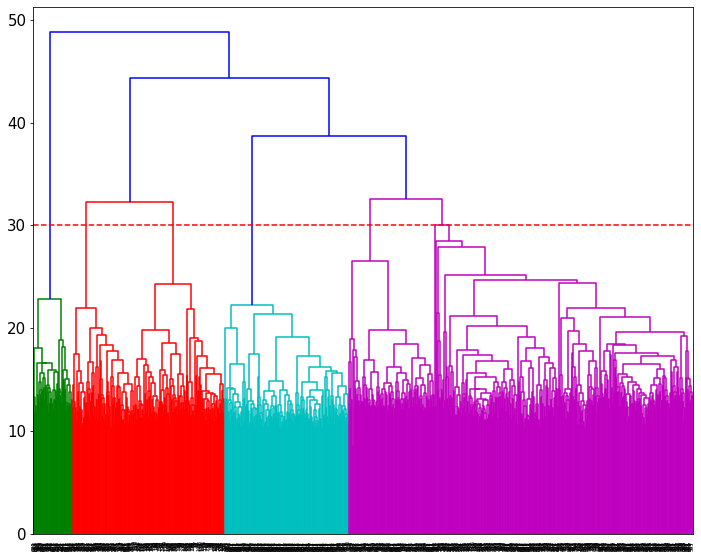

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
linkage_matrix = ward(BOW)
dendo = plt.subplots(figsize=(10, 8)) 
dendo = dendrogram(linkage_matrix, orientation="top");
plt.axhline(y=30, color='r', linestyle='--')
plt.tight_layout() 

(1000, 11598)
(1000, 2)
            0         1
0    1.131152  1.772042
1    0.961925  0.411440
2    0.614094  0.606436
3    0.023947 -0.466332
4    1.935746  1.763410
..        ...       ...
995  1.246014 -1.657897
996  1.309445 -1.380652
997  0.709622 -1.747783
998  1.331341 -1.916777
999  0.206253 -1.822460

[1000 rows x 2 columns]


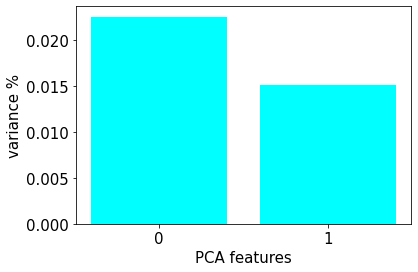

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=2)
pca_bow = pca.fit_transform(BOW)
tsne_bow=TSNE(n_components=2).fit_transform(BOW)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='cyan')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(data = pca_bow)
TSNE_components=pd.DataFrame(data=tsne_bow)
print(BOW.shape)
print(PCA_components.shape)
print(PCA_components)

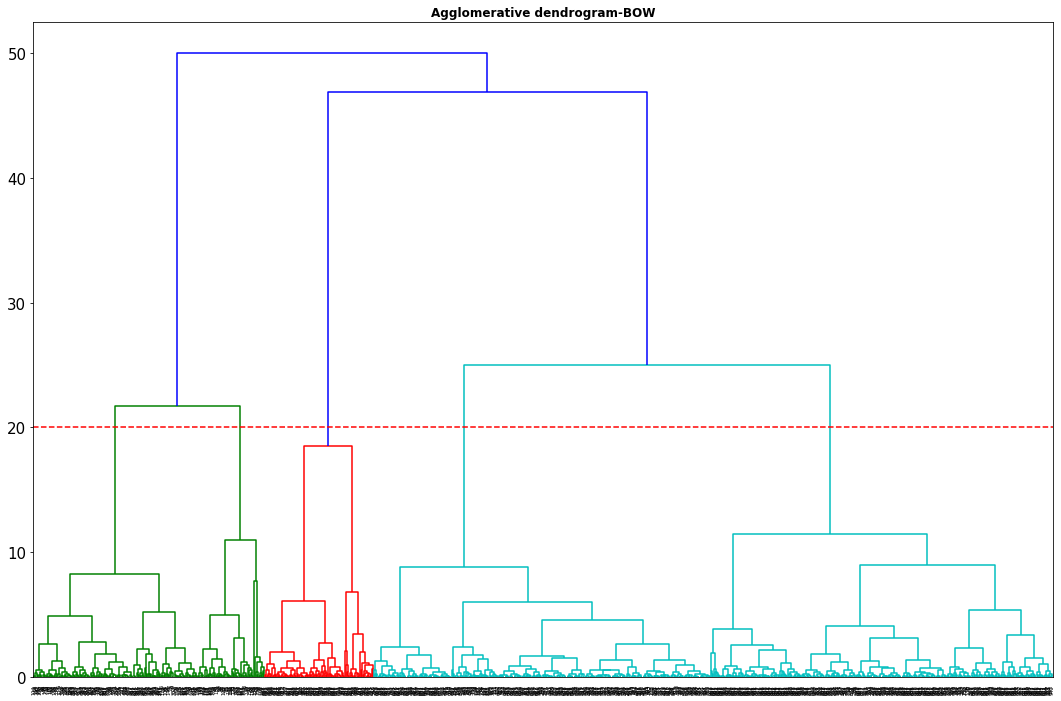

In [ ]:
linkage_matrix = ward(PCA_components)
dendo = plt.subplots(figsize=(15, 10)) 
dendo = dendrogram(linkage_matrix, orientation="top");
plt.axhline(y=20, color='r', linestyle='--')
plt.title('Agglomerative dendrogram-BOW', fontsize = 12,fontweight='bold')
plt.tight_layout() 

In [ ]:
# Implementing the hierarchical clustering.
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_predict = hc.fit_predict(PCA_components)

In [ ]:
# Check if clustering result is close to the human labels:
df_data=pd.DataFrame({'Authors':df_books['authors_labels'],
                  'Authors_Labels':df_books['labels_encoder'],
                  'Cluster_Labels': hc_predict})
df_data.sample(5)

,Authors,Authors_Labels,Cluster_Labels
211,Edgeworth,2,4
446,Whitman,4,3
656,Milton,3,3
29,Chesterton,1,2
571,Whitman,4,3


In [ ]:
df_data['Cluster_Labels'].value_counts()

1    336
3    330
4    161
0    107
2     66
Name: Cluster_Labels, dtype: int64

In [ ]:
# Clustering Mertrics calculation
def clustering_metrics(labels,clusters,vector,model):
  from sklearn import metrics
  kappa=metrics.cohen_kappa_score(labels, clusters,weights='linear')
  cluster_silhouette=metrics.silhouette_score(vector, clusters, metric='euclidean'),
  human_silhouette=metrics.silhouette_score(vector,labels,metric='euclidean')
  homogeneity=metrics.homogeneity_score(labels, clusters)
  completeness=metrics.completeness_score(labels, clusters)
  v_meas=metrics.v_measure_score(labels, clusters)
  ARI=metrics.adjusted_rand_score(labels, clusters)
  AMI=metrics.adjusted_mutual_info_score(labels,clusters)
  cluster_metrics=pd.DataFrame({'kappa':kappa,'cluster_silhouette':cluster_silhouette,
                              'human_silhouette':human_silhouette, 'homogeneity':homogeneity,
                              'completeness':completeness,'v_meas':v_meas,
                             'ARI':ARI,'AMI':AMI},index=[model])
  return cluster_metrics

In [ ]:
clustering_metrics_BOW=clustering_metrics(y,hc_predict,PCA_components,'BOW')
clustering_metrics_BOW

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
BOW,0.081158,0.426132,0.116768,0.450222,0.501495,0.474477,0.358688,0.471684


In [ ]:
def cont_matrix(y,clusters):
  import seaborn as sns
  from sklearn.metrics.cluster import contingency_matrix
  labels_df = df_books[['authors_labels', 'labels_encoder']].drop_duplicates().sort_values('labels_encoder')
  font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 14}
  h_contingency_matrix=contingency_matrix(y, clusters)
  plt.figure(figsize=(10,3))
  sns.heatmap(h_contingency_matrix, 
            annot=True,
            xticklabels=labels_df['authors_labels'].values, 
            yticklabels=labels_df['authors_labels'].values,
            cmap="Greens")
  plt.ylabel('Clustered',fontdict=font)
  plt.xlabel('Actual',fontdict=font)
  plt.title('Contingency Matrix EM',fontdict=font)
  plt.xticks(fontsize=12);plt.yticks(fontsize=12)
  plt.show()

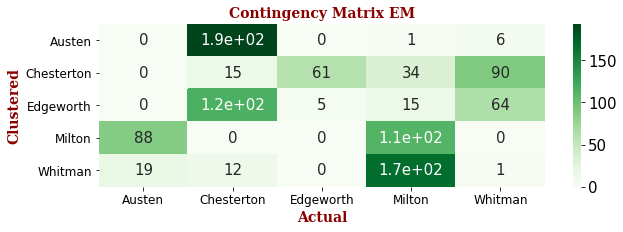

In [ ]:
cont_matrix(y,hc_predict)

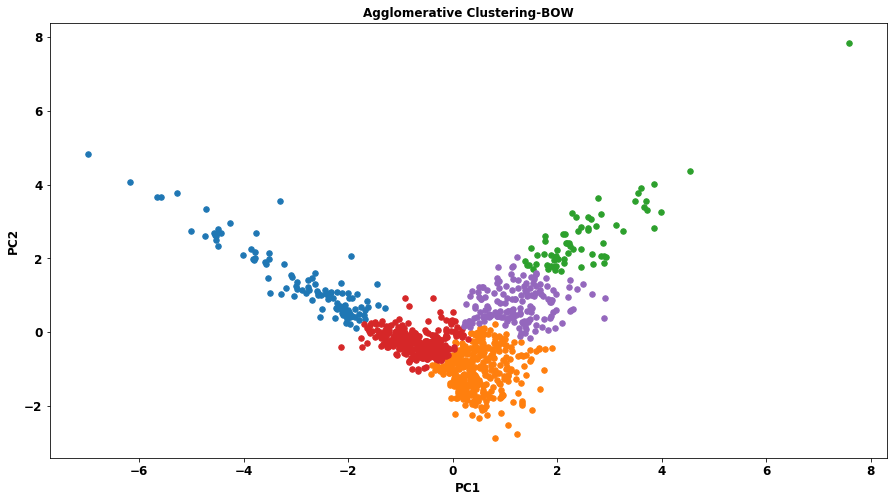

In [ ]:
#Now plot the results in a scatterplot.
for i in range(len(hc_predict)):
    filtered_label_hc = PCA_components[hc_predict == i]
    plt.scatter(filtered_label_hc.iloc[:,0] , filtered_label_hc.iloc[:,1] , s = 30)
fig = plt.gcf(); fig.set_size_inches(15, 8)
plt.title('Agglomerative Clustering-BOW', fontsize = 12,fontweight='bold')
plt.xlabel("PC1", fontsize = 12,fontweight='bold')
plt.ylabel("PC2", fontsize = 12,fontweight='bold')
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False; mpl.rcParams["axes.spines.top"] = False
from pylab import *
rc('axes', linewidth=3)
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
#plt.figure()

**Hierarchical Clustering using Word Embedding (WE)**

We now pass the skip-gram model to algorithm to plot dendogram and find the number of clusters.

In [ ]:
pca = PCA(n_components=2)
pca_we = pca.fit_transform(sg_model.wv.vectors)
# Save components to a DataFrame
PCA_components_WE = pd.DataFrame(data = sg_model.wv.vectors)

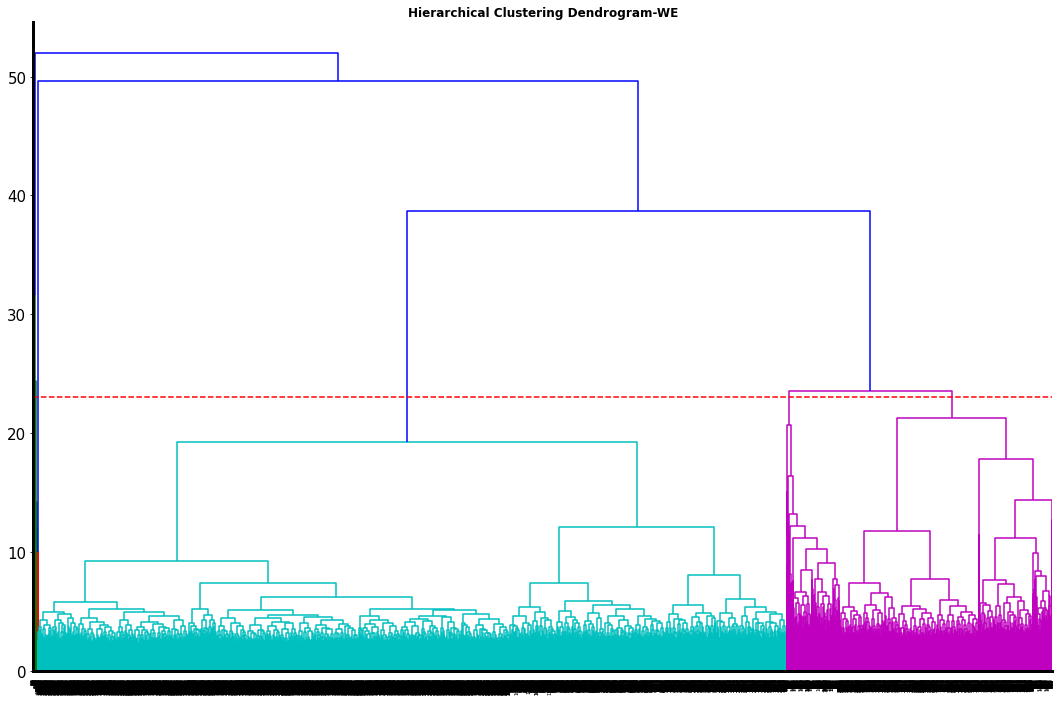

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
l = linkage(PCA_components_WE, method='complete', metric='seuclidean')
dendo = plt.subplots(figsize=(15, 10)) 
dendo = plt.title('Hierarchical Clustering Dendrogram-WE', fontsize = 12,fontweight='bold')
dendo = dendrogram(l, orientation="top");
plt.axhline(y=23, color='r', linestyle='--')
plt.tight_layout() 

From the above dendogram we found the number of cluster to be 5 which we pass to our hierarchical clustering model.

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_predict_wv = hc.fit_predict(PCA_components_WE)
#sg_model.wv.vectors

In [ ]:
#clustering_metrics_WE=clustering_metrics(y,hc_predict_wv,sg_model.wv.syn0,'WE')
from sklearn import metrics
kappa_WE=metrics.cohen_kappa_score(y, hc_predict_wv[:1000],weights='linear')
WE_cluster_silhouette=metrics.silhouette_score(PCA_components_WE, hc_predict_wv, metric='euclidean')
print('The cluster silhouette using WE = {}'.format(WE_cluster_silhouette))
model='WE'
clustering_metrics_WE=pd.DataFrame({'kappa':'--','cluster_silhouette':[WE_cluster_silhouette],
                              'human_silhouette':'--', 'homogeneity':'--',
                              'completeness':'--','v_meas':'--',
                             'ARI':'--','AMI':'--'},index=[model])
clustering_metrics_WE

The cluster silhouette using WE = 0.5940902233123779


,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
WE,--,0.59409,--,--,--,--,--,--


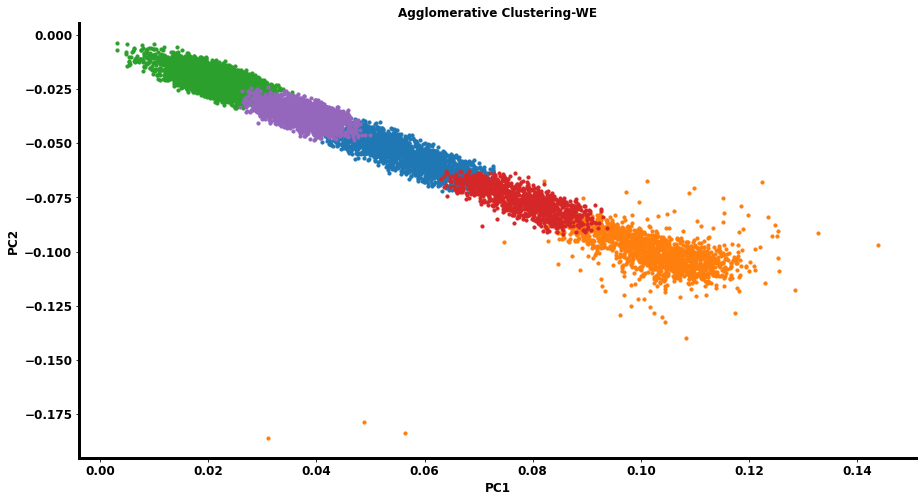

In [ ]:
#Now plot the graph to visualise the clusters.
for i in range(len(hc_predict_wv)):
    filtered_label_hc_wv = sg_model.wv.vectors[hc_predict_wv == i]
    plt.scatter(filtered_label_hc_wv[:,0] , filtered_label_hc_wv[:,1] , s = 10)

#plt.figure()

fig = plt.gcf(); fig.set_size_inches(15, 8)
plt.title('Agglomerative Clustering-WE', fontsize = 12,fontweight='bold')
plt.xlabel("PC1", fontsize = 12,fontweight='bold')
plt.ylabel("PC2", fontsize = 12,fontweight='bold')
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False; mpl.rcParams["axes.spines.top"] = False
from pylab import *
rc('axes', linewidth=3)
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')

## **Hierarchical Clustering using TF-iDF**


In [ ]:
pca = PCA(n_components=2)
pca_tf = pca.fit_transform(TF_iDF)
# Save components to a DataFrame
PCA_components_tf = pd.DataFrame(data = pca_tf)
print(TF_iDF.shape)
print(PCA_components_tf.shape)
print(PCA_components_tf)

(1000, 1398)
(1000, 2)
            0         1
0   -0.039887  0.198369
1   -0.065300  0.130979
2   -0.028340  0.168748
3   -0.005401  0.081381
4   -0.072526  0.162575
..        ...       ...
995 -0.172777 -0.160502
996 -0.225411 -0.196303
997 -0.158960 -0.149161
998 -0.204788 -0.173399
999 -0.124180 -0.162499

[1000 rows x 2 columns]


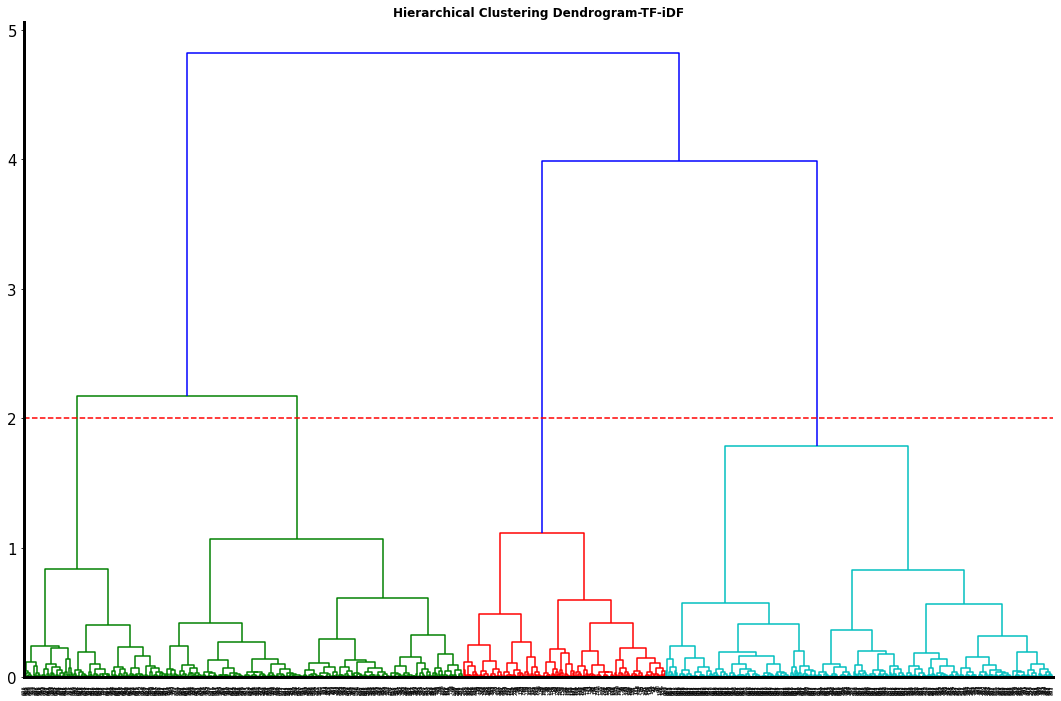

In [ ]:
linkage_matrix = ward(PCA_components_tf)
dendo = plt.subplots(figsize=(15, 10)) 
dendo = plt.title('Hierarchical Clustering Dendrogram-TF-iDF', fontsize = 12,fontweight='bold')
dendo = dendrogram(linkage_matrix, orientation="top");
plt.axhline(y=2, color='r', linestyle='--')

plt.tight_layout() 

In [ ]:
#Pass the number of clusters = 4 to heirarchical model.
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_predict_tf = hc.fit_predict(PCA_components_tf)

In [ ]:
clustering_metrics_TFiDF=clustering_metrics(y,hc_predict_tf,PCA_components_tf,'TF-iDF')

In [ ]:
clustering_metrics_TFiDF


,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
TF-iDF,-0.0528,0.429862,0.341368,0.622194,0.637219,0.629617,0.540229,0.627732


In [ ]:
# Check if clustering result is close to the human labels:
df_data=pd.DataFrame({'Authors':df_books['authors_labels'],
                  'Authors_Labels':df_books['labels_encoder'],
                  'Cluster_Labels': hc_predict_tf})
df_data.sample(5)

,Authors,Authors_Labels,Cluster_Labels
141,Chesterton,1,0
793,Milton,3,3
370,Edgeworth,2,2
429,Whitman,4,1
929,Austen,0,4


In [ ]:
df_data['Cluster_Labels'].value_counts()

1    289
2    229
0    197
4    147
3    138
Name: Cluster_Labels, dtype: int64

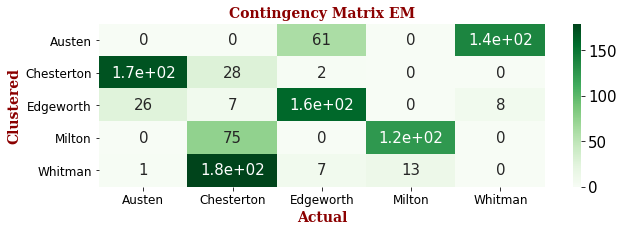

In [ ]:
cont_matrix(y,hc_predict_tf)

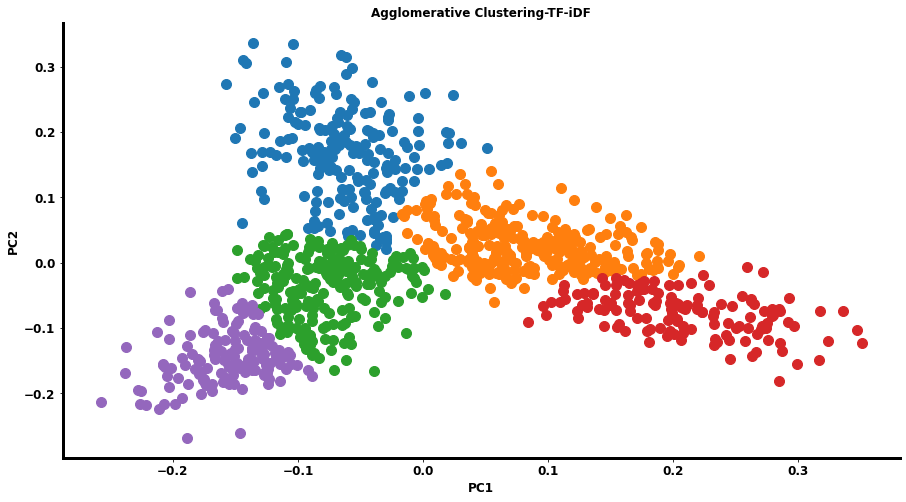

In [ ]:
for i in range(len(hc_predict_tf)):
    filtered_label_hc_tf = PCA_components_tf[hc_predict_tf == i]
    plt.scatter(filtered_label_hc_tf.iloc[:,0] , filtered_label_hc_tf.iloc[:,1] , s = 100)

fig = plt.gcf(); fig.set_size_inches(15, 8)
plt.title('Agglomerative Clustering-TF-iDF', fontsize = 12,fontweight='bold')
plt.xlabel("PC1", fontsize = 12,fontweight='bold')
plt.ylabel("PC2", fontsize = 12,fontweight='bold')
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False; mpl.rcParams["axes.spines.top"] = False
from pylab import *
rc('axes', linewidth=3)
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')

## **Hierarchical Clustering using LDA(sklean).**


In [ ]:
pca = PCA(n_components=2)
pca_lda = pca.fit_transform(lda_output)

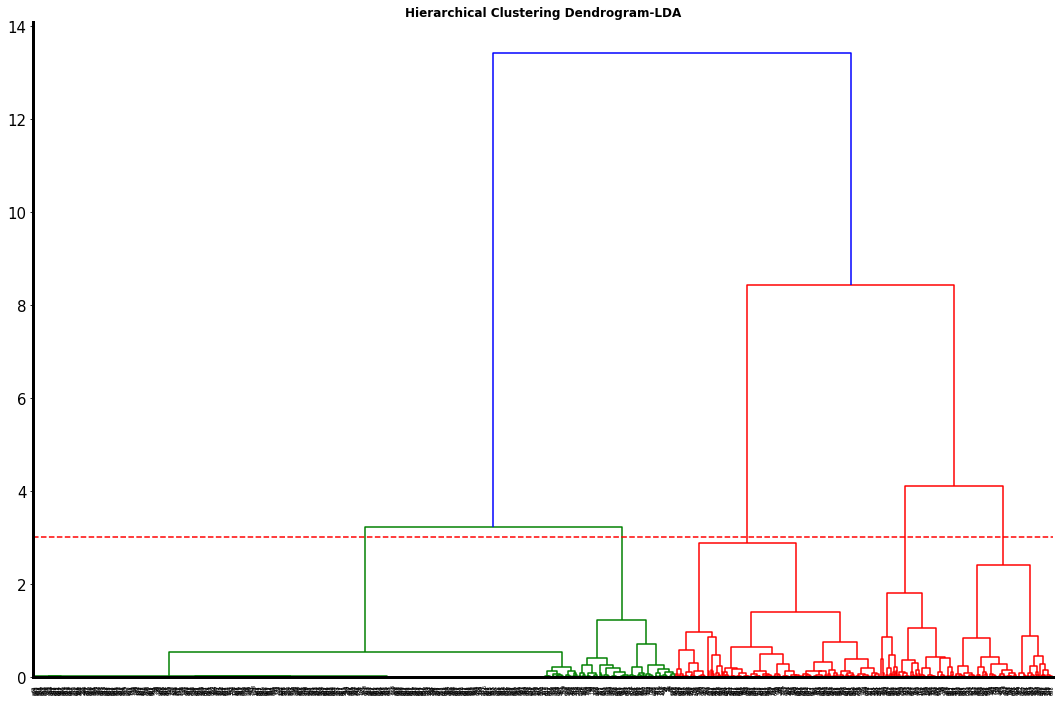

In [ ]:
#Plot the dendogram to find the total number of clusters. Here we get n = 4
linkage_matrix = ward(pca_lda)
dendo = plt.subplots(figsize=(15,10)) 
dendo = dendrogram(linkage_matrix, orientation="top");
dendo = plt.title('Hierarchical Clustering Dendrogram-LDA', fontsize = 12,fontweight='bold')
plt.axhline(y=3, color='r', linestyle='--')
plt.tight_layout() 

In [ ]:
#Pass values from PCA to our hierarchical model where n=4
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_predict_lda = hc.fit_predict(pca_lda)

In [ ]:
clustering_metrics_LDA=clustering_metrics(y,hc_predict_lda,pca_lda,'LDA')

In [ ]:
clustering_metrics_LDA


,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
LDA,-0.384894,0.692035,-0.153249,0.259757,0.322028,0.28756,0.209046,0.283576


In [ ]:
# Check if clustering result is close to the human labels:
df_data=pd.DataFrame({'Authors':df_books['authors_labels'],
                  'Authors_Labels':df_books['labels_encoder'],
                  'Cluster_Labels': hc_predict_lda})
df_data.sample(5)

,Authors,Authors_Labels,Cluster_Labels
738,Milton,3,1
532,Whitman,4,4
43,Chesterton,1,4
229,Edgeworth,2,4
840,Austen,0,4


In [ ]:
df_data['Cluster_Labels'].value_counts()

4    534
0    201
1     97
2     96
3     72
Name: Cluster_Labels, dtype: int64

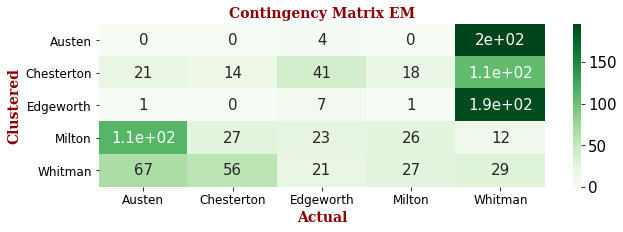

In [ ]:
cont_matrix(y,hc_predict_lda)

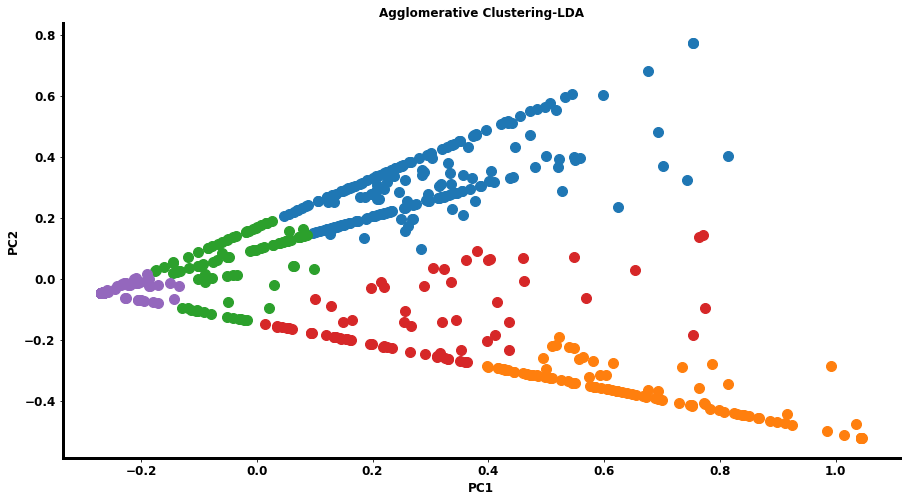

In [ ]:
for i in range(len(pca_lda)):
    filtered_label_hc_lda = pca_lda[hc_predict_lda == i]
    plt.scatter(filtered_label_hc_lda[:,0] , filtered_label_hc_lda[:,1] , s = 100)

fig = plt.gcf(); fig.set_size_inches(15, 8)
plt.title('Agglomerative Clustering-LDA', fontsize = 12,fontweight='bold')
plt.xlabel("PC1", fontsize = 12,fontweight='bold')
plt.ylabel("PC2", fontsize = 12,fontweight='bold')
import matplotlib as mpl
mpl.rcParams["axes.spines.right"] = False; mpl.rcParams["axes.spines.top"] = False
from pylab import *
rc('axes', linewidth=3)
fontsize = 12
ax = gca()
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')

**Summerize the metrics**


In [ ]:
H_metrics=[clustering_metrics_LDA,clustering_metrics_TFiDF,clustering_metrics_BOW,clustering_metrics_WE]
df_summary = pd.DataFrame()
for df in H_metrics:
  df_summary=df_summary.append(df)
df_summary

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
LDA,-0.384894,0.692035,-0.153249,0.259757,0.322028,0.28756,0.209046,0.283576
TF-iDF,-0.0528002,0.429862,0.341368,0.622194,0.637219,0.629617,0.540229,0.627732
BOW,0.0811579,0.426132,0.116768,0.450222,0.501495,0.474477,0.358688,0.471684
WE,--,0.594090,--,--,--,--,--,--


In [ ]:
df_summary.to_excel("HI.xlsx", index=True)
#df_books1.to_csv('students.csv', index=False)
#filename = '/content/output.xlsx'
#df2 = pd.read_excel(filename)
# Load car loan data from a csv file
#filename = '/content/students.csv'
#df3 = pd.read_csv(filename)

In [ ]:
df_summary.sort_values('cluster_silhouette', ascending=True)

,kappa,cluster_silhouette,human_silhouette,homogeneity,completeness,v_meas,ARI,AMI
BOW,0.0811579,0.426132,0.116768,0.450222,0.501495,0.474477,0.358688,0.471684
TF-iDF,-0.0528002,0.429862,0.341368,0.622194,0.637219,0.629617,0.540229,0.627732
WE,--,0.594090,--,--,--,--,--,--
LDA,-0.384894,0.692035,-0.153249,0.259757,0.322028,0.28756,0.209046,0.283576


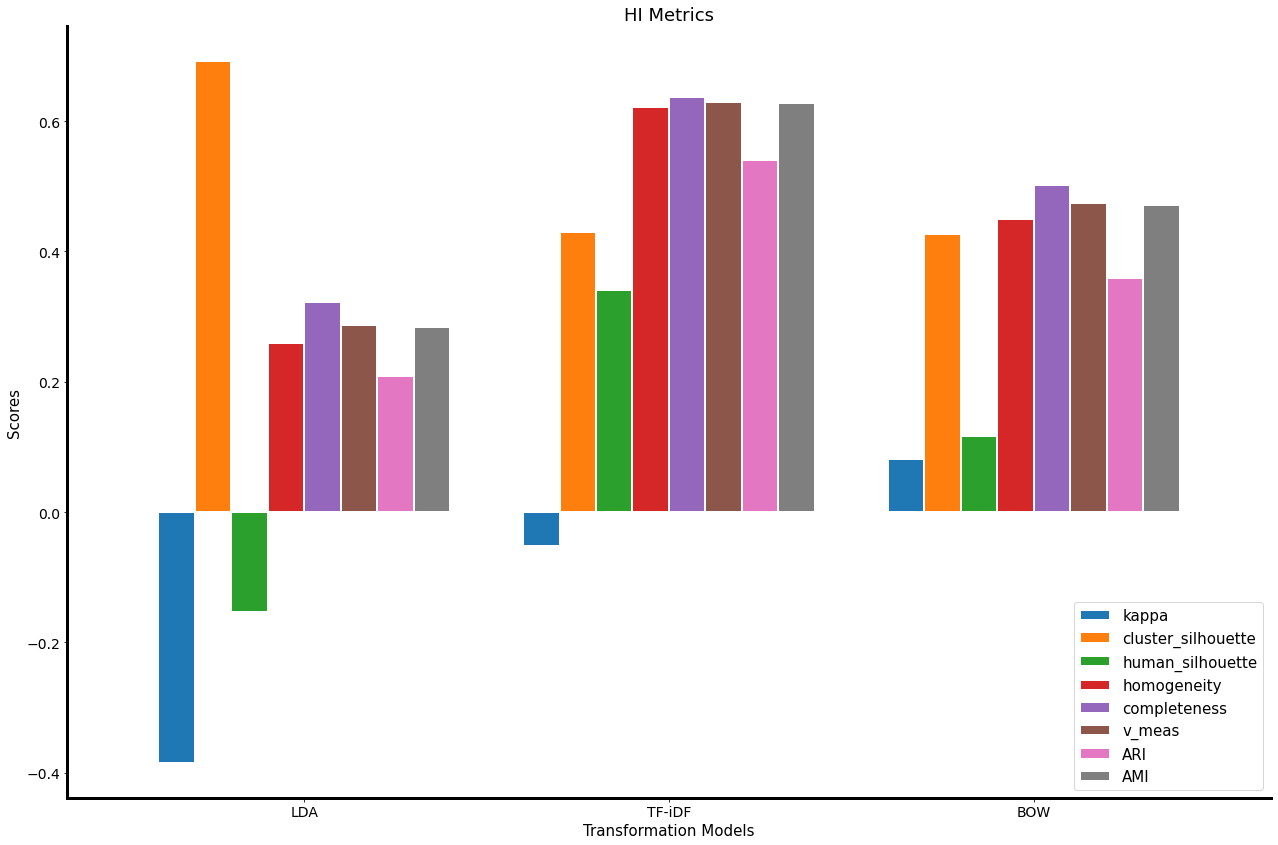

In [ ]:
vis_df1=df_summary[:3]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, xlabel='Transformation Models', ylabel='Scores', width=0.8,rot=0,figsize=(18,12),
                      title="HI Metrics",alpha=1,
                      edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}     
plot.rcParams.update(params)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

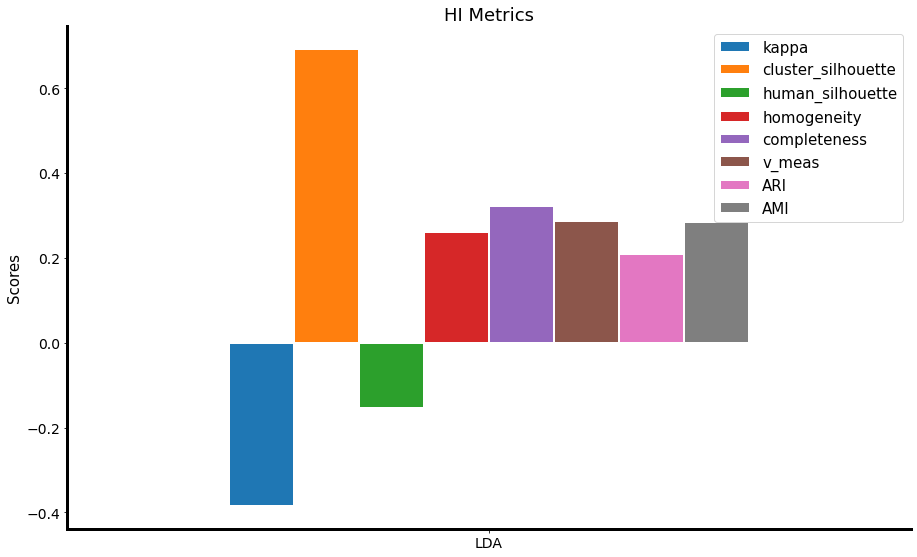

In [ ]:
vis_df1=df_summary[:1]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, ylabel='Scores',
                      width=0.8,rot=0,figsize=(13,8),
                      title="HI Metrics",alpha=1,edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

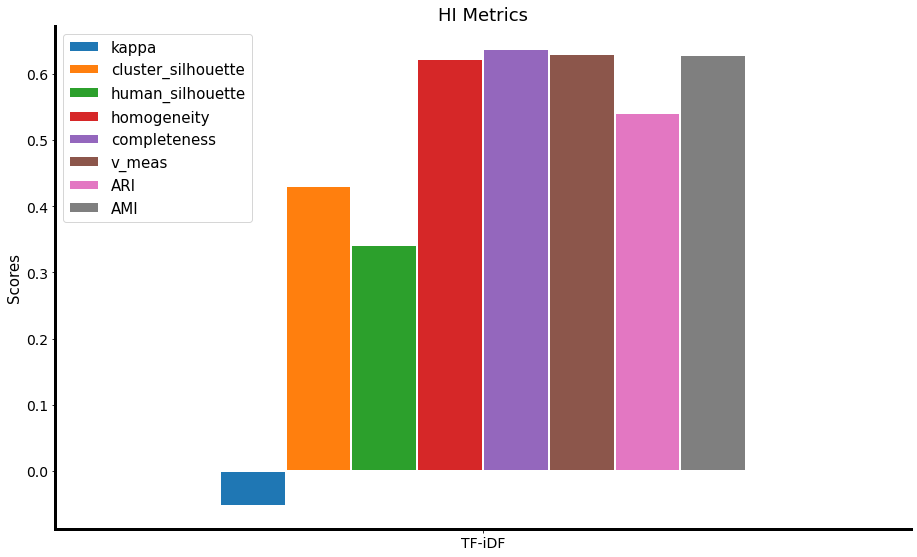

In [ ]:
vis_df1=df_summary[1:2]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, ylabel='Scores',width=0.8,
                      rot=0,figsize=(13,8),title="HI Metrics",alpha=1,edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

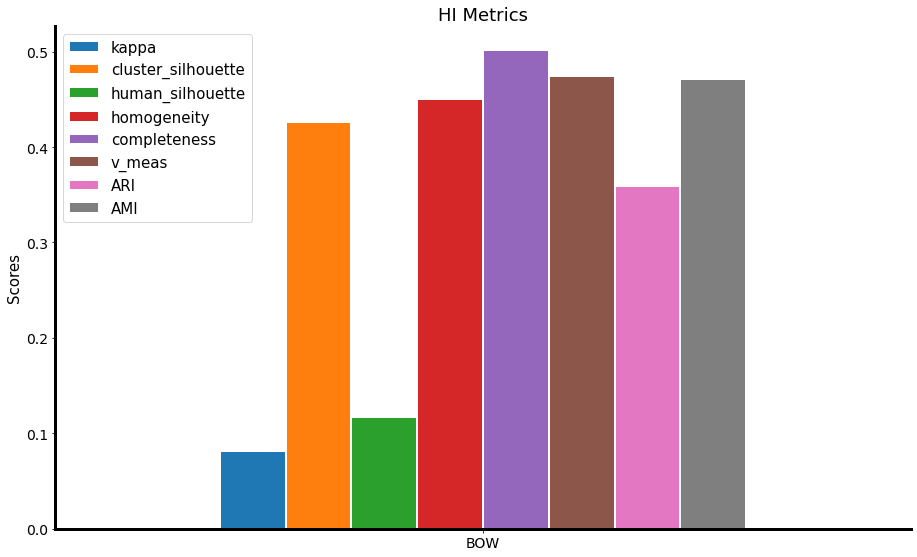

In [ ]:
vis_df1=df_summary[2:3]
vis_df1
ax = vis_df1.plot.bar(fontsize=14, ylabel='Scores',
                      width=0.8,rot=0,figsize=(13,8),title="HI Metrics",alpha=1,edgecolor='white', linewidth=2)
plt.tight_layout()
plt.show(block=True)
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

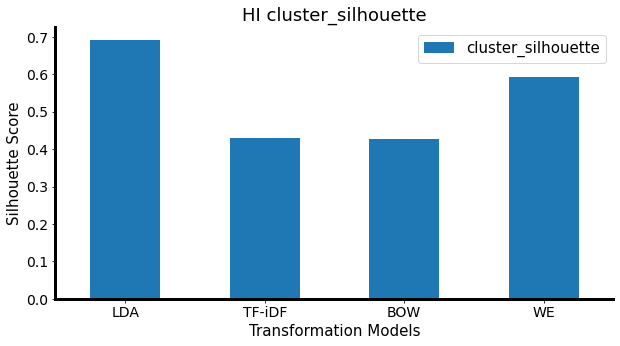

In [ ]:
vis_df=df_summary[['cluster_silhouette']]
vis_df
ax = vis_df.plot.bar(fontsize=14, xlabel='Transformation Models', ylabel='Silhouette Score',rot=0,figsize=(10,5),title="HI cluster_silhouette",legend=True)